In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('piigss.csv')

df = df.drop(df.index[-1])


print(df)
returns = df.drop(columns='Date').pct_change() 
print(returns)

            Date      IT40   IBEX35         GDAT         ISEQ   PSI
0       1/4/2010  23545.02  11966.1  2189.719971  3097.760010  8602
1       1/5/2010  23555.73  11958.3  2277.600098  3071.520020  8672
2       1/6/2010  23622.29  11999.8  2310.110107  3087.929932  8680
3       1/7/2010  23709.01  11845.0  2327.570068  3070.469971  8766
4       1/8/2010  23811.13  11870.7  2315.310059  3080.750000  8821
...          ...       ...      ...          ...          ...   ...
3059  12/22/2021  26827.93   8459.1   910.230010  8245.950000  5462
3060  12/23/2021  27016.22   8563.7   911.120000  8369.690000  5432
3061  12/27/2021  27231.20   8622.1   912.220000  8372.350000  5473
3062  12/28/2021  27444.93   8688.9   899.670000  8372.350000  5423
3063  12/29/2021  27344.25   8673.7   895.740000  8372.350000  5416

[3064 rows x 6 columns]
          IT40    IBEX35      GDAT      ISEQ       PSI
0          NaN       NaN       NaN       NaN       NaN
1     0.000455 -0.000652  0.040133 -0.008471  0.0

In [6]:

nan_returns = returns[np.isnan(returns).any(axis=1)]
inf_returns = returns[np.isinf(returns).any(axis=1)]
print("\nNaN values in returns:")
print(nan_returns)
print("\nInfinite values in returns:")
print(inf_returns)



NaN values in returns:
   IT40  IBEX35  GDAT  ISEQ  PSI
0   NaN     NaN   NaN   NaN  NaN

Infinite values in returns:
Empty DataFrame
Columns: [IT40, IBEX35, GDAT, ISEQ, PSI]
Index: []


In [7]:
returns = df.drop(columns='Date').pct_change() 
print(returns)


          IT40    IBEX35      GDAT      ISEQ       PSI
0          NaN       NaN       NaN       NaN       NaN
1     0.000455 -0.000652  0.040133 -0.008471  0.008138
2     0.002826  0.003470  0.014274  0.005343  0.000923
3     0.003671 -0.012900  0.007558 -0.005654  0.009908
4     0.004307  0.002170 -0.005267  0.003348  0.006274
...        ...       ...       ...       ...       ...
3059  0.006552  0.008537  0.005946  0.006302  0.007192
3060  0.007018  0.012365  0.000978  0.015006 -0.005492
3061  0.007957  0.006819  0.001207  0.000318  0.007548
3062  0.007849  0.007748 -0.013758  0.000000 -0.009136
3063 -0.003668 -0.001749 -0.004368  0.000000 -0.001291

[3064 rows x 5 columns]


In [8]:
returns_clean = returns.dropna()


print("Cleaned returns DataFrame:")
print(returns_clean)


Cleaned returns DataFrame:
          IT40    IBEX35      GDAT      ISEQ       PSI
1     0.000455 -0.000652  0.040133 -0.008471  0.008138
2     0.002826  0.003470  0.014274  0.005343  0.000923
3     0.003671 -0.012900  0.007558 -0.005654  0.009908
4     0.004307  0.002170 -0.005267  0.003348  0.006274
5    -0.001527  0.012796 -0.050006  0.006145 -0.000227
...        ...       ...       ...       ...       ...
3059  0.006552  0.008537  0.005946  0.006302  0.007192
3060  0.007018  0.012365  0.000978  0.015006 -0.005492
3061  0.007957  0.006819  0.001207  0.000318  0.007548
3062  0.007849  0.007748 -0.013758  0.000000 -0.009136
3063 -0.003668 -0.001749 -0.004368  0.000000 -0.001291

[3063 rows x 5 columns]


In [9]:

correlation_matrix = returns_clean.corr(method='pearson')

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            IT40    IBEX35      GDAT      ISEQ       PSI
IT40    1.000000  0.079377  0.006494  0.005670  0.076098
IBEX35  0.079377  1.000000 -0.008937  0.027375 -0.007659
GDAT    0.006494 -0.008937  1.000000 -0.014924  0.023260
ISEQ    0.005670  0.027375 -0.014924  1.000000  0.032471
PSI     0.076098 -0.007659  0.023260  0.032471  1.000000


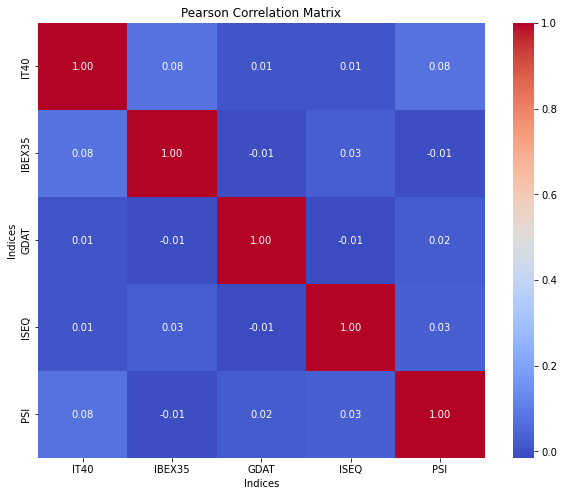

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.xlabel("Indices")
plt.ylabel("Indices")
plt.show()


In [11]:
from scipy.stats import pearsonr

p_values = pd.DataFrame(index=returns_clean.columns, columns=returns_clean.columns)

for i in returns_clean.columns:
    for j in returns_clean.columns:
        if i != j:
            corr, p_value = pearsonr(returns_clean[i], returns_clean[j])
            p_values.loc[i, j] = p_value


print("P-values for Significance Testing:")
print(p_values)


P-values for Significance Testing:
            IT40    IBEX35      GDAT      ISEQ       PSI
IT40         NaN  0.000011  0.719403  0.753766  0.000025
IBEX35  0.000011       NaN  0.621005  0.129842  0.671753
GDAT    0.719403  0.621005       NaN  0.408984  0.198111
ISEQ    0.753766  0.129842  0.408984       NaN  0.072367
PSI     0.000025  0.671753  0.198111  0.072367       NaN


In [12]:
significance = pd.DataFrame(index=returns_clean.columns, columns=returns_clean.columns)

alpha = 0.01

for i in returns_clean.columns:
    for j in returns_clean.columns:
        if i != j:
            corr, p_value = pearsonr(returns_clean[i], returns_clean[j])
            if p_value < alpha:
                significance.loc[i, j] = 'Significant'
            else:
                significance.loc[i, j] = 'Not Significant'

print("Significance Interpretation:")
print(significance)


Significance Interpretation:
                   IT40           IBEX35             GDAT             ISEQ  \
IT40                NaN      Significant  Not Significant  Not Significant   
IBEX35      Significant              NaN  Not Significant  Not Significant   
GDAT    Not Significant  Not Significant              NaN  Not Significant   
ISEQ    Not Significant  Not Significant  Not Significant              NaN   
PSI         Significant  Not Significant  Not Significant  Not Significant   

                    PSI  
IT40        Significant  
IBEX35  Not Significant  
GDAT    Not Significant  
ISEQ    Not Significant  
PSI                 NaN  


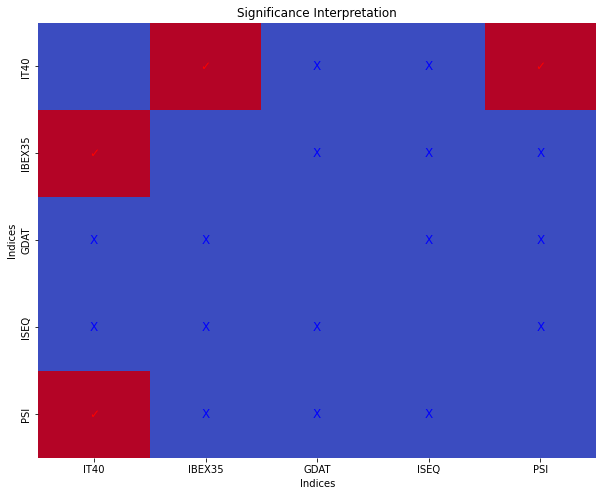

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(significance=='Significant', cmap='coolwarm', cbar=False)

for i in range(len(significance.columns)):
    for j in range(len(significance.columns)):
        if significance.iloc[i, j] == 'Significant':
            heatmap.text(j+0.5, i+0.5, '✓', ha='center', va='center', color='red', fontsize=12)
        elif significance.iloc[i, j] == 'Not Significant':
            heatmap.text(j+0.5, i+0.5, 'X', ha='center', va='center', color='blue', fontsize=12)

plt.title("Significance Interpretation")
plt.xlabel("Indices")
plt.ylabel("Indices")
plt.show()


In [14]:

spearman_correlation_matrix = returns_clean.corr(method='spearman')


print("Spearman Correlation Matrix:")
print(spearman_correlation_matrix)

Spearman Correlation Matrix:
            IT40    IBEX35      GDAT      ISEQ       PSI
IT40    1.000000  0.036918  0.001748  0.006184  0.063526
IBEX35  0.036918  1.000000 -0.012877  0.008179 -0.014662
GDAT    0.001748 -0.012877  1.000000  0.007846  0.022817
ISEQ    0.006184  0.008179  0.007846  1.000000  0.019640
PSI     0.063526 -0.014662  0.022817  0.019640  1.000000


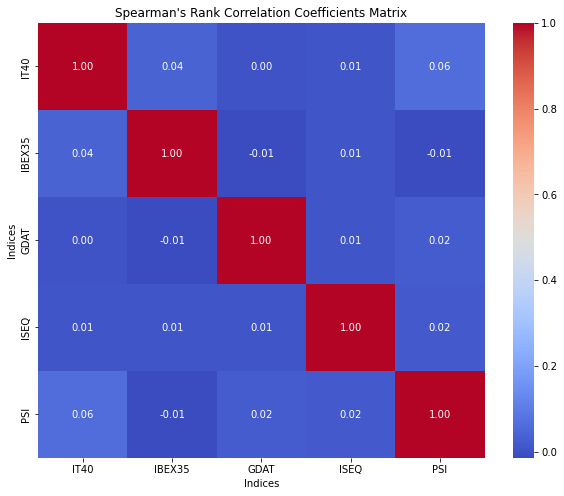

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's Rank Correlation Coefficients Matrix")
plt.xlabel("Indices")
plt.ylabel("Indices")
plt.show()


In [16]:
from scipy.stats import spearmanr

spearman_p_values = pd.DataFrame(index=returns_clean.columns, columns=returns_clean.columns)


for i in returns_clean.columns:
    for j in returns_clean.columns:
        if i != j:
            spearman_corr, spearman_p_value = spearmanr(returns_clean[i], returns_clean[j])
            spearman_p_values.loc[i, j] = spearman_p_value

print("Spearman P-values for Significance Testing:")
print(spearman_p_values)


Spearman P-values for Significance Testing:
            IT40    IBEX35      GDAT      ISEQ       PSI
IT40         NaN  0.041046  0.922945  0.732254  0.000435
IBEX35  0.041046       NaN  0.476225  0.650921  0.417264
GDAT    0.922945  0.476225       NaN   0.66424  0.206788
ISEQ    0.732254  0.650921   0.66424       NaN  0.277198
PSI     0.000435  0.417264  0.206788  0.277198       NaN


In [17]:
spearman_significance = pd.DataFrame(index=returns_clean.columns, columns=returns_clean.columns)
alpha = 0.01


for i in returns_clean.columns:
    for j in returns_clean.columns:
        if i != j:
            spearman_corr, spearman_p_value = spearmanr(returns_clean[i], returns_clean[j])
            if spearman_p_value < alpha:
                spearman_significance.loc[i, j] = 'Significant'
            else:
                spearman_significance.loc[i, j] = 'Not Significant'


print("Spearman Significance Interpretation:")
print(spearman_significance)


Spearman Significance Interpretation:
                   IT40           IBEX35             GDAT             ISEQ  \
IT40                NaN  Not Significant  Not Significant  Not Significant   
IBEX35  Not Significant              NaN  Not Significant  Not Significant   
GDAT    Not Significant  Not Significant              NaN  Not Significant   
ISEQ    Not Significant  Not Significant  Not Significant              NaN   
PSI         Significant  Not Significant  Not Significant  Not Significant   

                    PSI  
IT40        Significant  
IBEX35  Not Significant  
GDAT    Not Significant  
ISEQ    Not Significant  
PSI                 NaN  


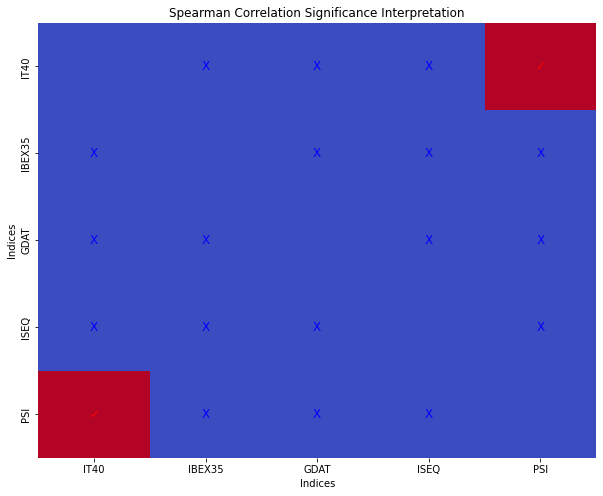

In [18]:
plt.figure(figsize=(10, 8))
spearman_heatmap = sns.heatmap(spearman_significance=='Significant', cmap='coolwarm', cbar=False)


for i in range(len(spearman_significance.columns)):
    for j in range(len(spearman_significance.columns)):
        if spearman_significance.iloc[i, j] == 'Significant':
            spearman_heatmap.text(j+0.5, i+0.5, '✓', ha='center', va='center', color='red', fontsize=12)
        elif spearman_significance.iloc[i, j] == 'Not Significant':
            spearman_heatmap.text(j+0.5, i+0.5, 'X', ha='center', va='center', color='blue', fontsize=12)

plt.title("Spearman Correlation Significance Interpretation")
plt.xlabel("Indices")
plt.ylabel("Indices")
plt.show()
